In [21]:
import gboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 2000)

In [2]:
    data = gboost.data_clean()
    X, y = gboost.define_features_and_target(data, 'Fraud')
    X_train, X_test, y_train, y_test = gboost.split_data(X, y)

In [3]:
    gb_params = {
        'learning_rate' : [0.1, 0.01],
        'n_estimators' : [100, 500, 1000],
        'subsample' : [1, 0.5],
        'min_samples_split' : [2, 3],
        'max_depth' : [3, 5],
    }

In [4]:
    lr_params = {
        'C' : [1, 0.1]
    }

In [5]:
   recall_scorer = make_scorer(gboost.score_model, greater_is_better=True)

In [6]:
    gb = GradientBoostingClassifier()
    lr = LogisticRegression()

In [7]:
    gscv = GridSearchCV(gb, param_grid=gb_params,
                        scoring=recall_scorer,
                        cv=3,
                        n_jobs=-1)

In [8]:
    clf = gscv.fit(X_train, y_train)

In [9]:
clf.best_score_

0.6875649142684732

In [10]:
clf.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [11]:
predictions = clf.predict(X_test)
recall_score(y_test, predictions)

0.640625

In [12]:
predicted_probs = clf.predict_proba(X_test)[:,1]

In [13]:
roc_auc_score(y_test, predicted_probs)

0.9583212098009188

In [14]:
fpr, tpr, thresh = roc_curve(y_test, predicted_probs)

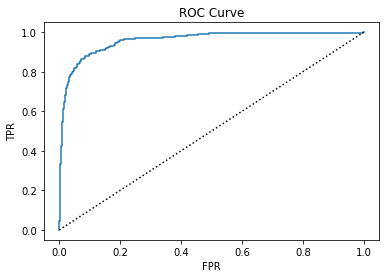

In [15]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k:')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR");

In [22]:
pd.DataFrame(data={'frp': fpr, 'tpr': tpr, 'Thresholds': thresh})

,frp,tpr,Thresholds
0,0.000000,0.000000,2.000000e+00
1,0.000306,0.000000,1.000000e+00
2,0.000306,0.021875,9.997953e-01
3,0.000306,0.028125,9.997610e-01
4,0.000306,0.043750,9.988054e-01
5,0.000613,0.043750,9.987838e-01
6,0.000613,0.046875,9.986610e-01
7,0.000919,0.046875,9.985838e-01
8,0.000919,0.078125,9.975689e-01
9,0.001225,0.078125,9.974106e-01
